In [31]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import minimize

np.set_printoptions(precision=3, suppress=True)
np.set_printoptions(legacy='1.13')

beta, alpha = 1.2,2
N = 20 #number of product

## 🧪 Practice 2: Log-Inversion of Market Shares

### 🎯 Goal
Recover mean utility $\delta_j$ from observed market shares under the logit model.

### 💡 Formula
From the logit structure:

$$
\delta_j = \log(s_j) - \log(s_0)
$$

### ✅ What You Did
- Simulated $\delta_j$, computed $s_j$
- Inverted $s_j$ to get back $\delta_j^{\text{inv}}$
- Verified recovery by plotting: true $\delta_j$ vs. inverted $\delta_j$

### 📈 Result
Points lie on the 45° line — inversion works!

This step builds the core intuition for the BLP inner loop.

[-10.585  -1.929  -1.186  -4.038  -3.155  -3.938  -3.908  -9.159  -3.943
  -5.722  -6.302  -0.625  -7.786  -2.778 -10.029  -8.825  -1.166  -7.2
  -2.311  -3.906]
[ 0.     0.056  0.117  0.007  0.016  0.007  0.008  0.     0.007  0.001
  0.001  0.205  0.     0.024  0.     0.     0.12   0.     0.038  0.008
  0.384]


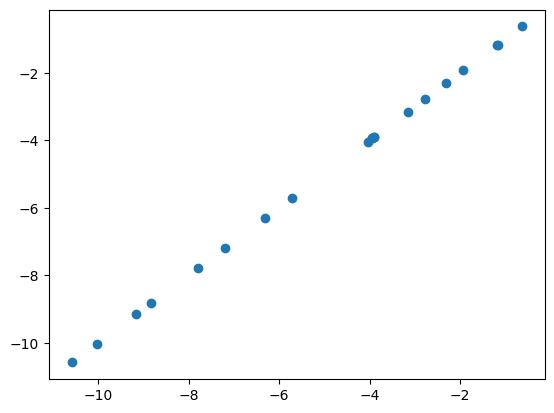

In [32]:
# Simulaton:
def mean_utility(beta, alpha, N): #one mean utility 
    x = np.random.normal(0,1, N)
    p = np.random.uniform(1,5, N)
    return x*beta - alpha*p

def market_share(delta_array):
    no_product = len(delta_array)
    output = np.zeros(no_product+1)
    denom = 1 + sum([np.exp(i) for i in delta_array])
    for i in range(no_product):
        output[i] = np.exp(delta_array[i])/denom
    output[-1] = 1 - sum(output)
    return output

mean_delta = mean_utility(beta,alpha,N)
share = market_share(mean_delta)
print(mean_delta)
print(share)
# now we have arrived at the market share 
inverted_delta = []
for i in range(len(share)-1):
    inverted_delta.append(np.log(share[i]) - np.log(share[-1]))

plt.scatter(mean_delta, inverted_delta)
plt.show()
